In [ ]:
## Find common abbreviations and edit earlier
## Remove swear words or very specific language (horoscopes, picture of the week, etc.)

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import re
from collections import Counter
from nltk.corpus import stopwords
#import spacy
#import wordcloud

In [2]:
# Loading model
#nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

In [4]:
data = pd.read_csv('../data/Combined Data v2.csv')

In [5]:
print(data.shape)
data

(420655, 5)


,Unnamed: 0,headline,date,source,is_sarcastic
0,0,former versace store clerk sues over secret 'b...,2019-01-01,Huffington Post,0
1,1,the 'roseanne' revival catches up to our thorn...,2019-01-01,Huffington Post,0
2,2,j.k. rowling wishes snape happy birthday in th...,2019-01-01,Huffington Post,0
3,3,advancing the world's women,2019-01-01,Huffington Post,0
4,4,the fascinating case for eating lab-grown meat,2019-01-01,Huffington Post,0
...,...,...,...,...,...
420650,6961,5 Sizzling Pleasure Zones on His Body That Dou...,2016,Reductress,1
420651,6962,Healthy Travel Snacks to Regret Packing,2016,Reductress,1
420652,6963,6 Pairs of Boots That All Know You Sincerely L...,2016,Reductress,1
420653,6964,Mansledders: The Manspreaders of the Ski World,2016,Reductress,1


In [6]:
# data['year'] = data['date'].apply(lambda x: ''.join(re.findall('^[0-9]+-[0-9]+-([0-9]{2})', x)))
# data['year'].unique()
data['year'] = data['date'].apply(lambda x: x[:4])
data['year'].unique()

array(['2019', '2018', '2017', '2016', '2020'], dtype=object)

In [7]:
data['len'] = data['headline'].apply(lambda x: len(x.split(" ")))

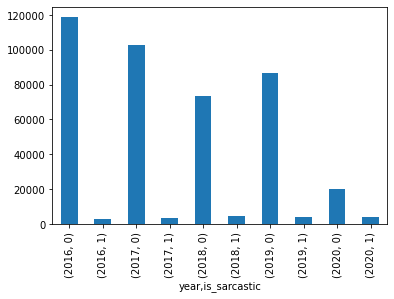

In [8]:
data.groupby(['year', 'is_sarcastic']).size().plot.bar()
plt.show()

In [9]:
## Preprocessing:

# Lowercase:
data['clean'] = data['headline'].apply(lambda x: x.lower())

# Expand Contractions:
# https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

# Expanding Contractions in the headlines
data['clean'] = data['clean'].apply(lambda x: expand_contractions(x))

# Remove special characters
# Only Letters
# re.findall('[a-zA-Z]+',data['clean'][883])

# Letters and Numbers
data['clean'] = data['clean'].apply(lambda x: " ".join(re.findall('\w+', x)))


In [41]:
#Profanity Removal 
file = open('profanity_wordlist.txt','r')
words = []
for line in file:
    stripped_line = line.strip()
    words.append(stripped_line)

fake_swears = ['anus','aryan','bdsm','bondage','breasts','crap','drunk','enlargement','erection','erotic',
              'erotism','facial','fat','gay','gays','gigolo','glans','god','hell', 'hemp','heroin','herpes',
              'hitler','hiv','hookah','hooker','hooter','hooters','hump','humped','humping','incest','jerk',
              'junkie','junky','kill','klan','kraut','LEN','lesbians','lesbos','loin','loins','lube','lust',
              'lusting','lusty','masochist','masturbate','masturbating','masturbation','menses','menstruate',
               'menstruation','meth','molest','moron','muff', 'murder','naked','napalm','nazi','nazism','nipple',
               'nipples','nude', 'nudes','opiate','opium','oral','orally','organ','ovary','ovum','ovums','pawn',
               'pcp','pedo','pedophile','pedophilia','pedophiliac','penetrate','penetration','perversion','peyote',
               'phallic','pimp', 'playboy','pollock','porn', 'pornography','pornos','pot','potty','prick','pricks',
               'prostitute','prude','punky','queer','quicky','racy','rape','raped','raper','raping','rapist',
               'raunch','revue','rum','rump','sadism','sadist','sandbar','scantilly','screw','screwed','screwing',
               'scum','seaman','seamen','seduce', 'sex','sexual','slave','sleaze','sleazy','slope','smut','smutty',
               'snatch','sniper','snuff','sodom', 'souse', 'steamy', 'stoned', 'strip', 'strip club', 'stripclub',
               'stroke','stupied','suck','sucked','sucking','tampon','tawdry','thrust', 'toke','tramp', 'trashy',
               'ugly','unwed','urinal','urine','uterus','uzi','valium','viagra','virgin','vixen','vodka','vomit',
               'voyeur','vulgar','weed','weirdo','wench','yury']

real_swears = list()
for word in words:
    if word not in fake_swears:
        real_swears.append(word)

profanity = list()

def profanity_remove(text):
    initial_words = text.split()
    new_words = list(filter(lambda w: w not in real_swears, initial_words))
    new_text = ' '.join(new_words)
    return " ".join(new_text)

data['clean'] = data['clean'].apply(lambda x:profanity_remove(x))

['nice']

In [49]:
def no_more_bad_words(text):
    new_words = list(filter(lambda w: w not in real_swears, text.split()))
    return new_words

In [51]:
data['no_bad_words'] = data['clean'].apply(no_more_bad_words)

C:\Users\yagne\.conda\envs\common\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
data

,Unnamed: 0,headline,date,source,is_sarcastic,year,len,clean,no_bad_words
0,0,former versace store clerk sues over secret 'b...,2019-01-01,Huffington Post,0,2019,12,former versace store clerk sues over secret bl...,"[former, versace, store, clerk, sues, over, se..."
1,1,the 'roseanne' revival catches up to our thorn...,2019-01-01,Huffington Post,0,2019,14,the roseanne revival catches up to our thorny ...,"[the, roseanne, revival, catches, up, to, our,..."
2,2,j.k. rowling wishes snape happy birthday in th...,2019-01-01,Huffington Post,0,2019,11,j k rowling wishes snape happy birthday in the...,"[j, k, rowling, wishes, snape, happy, birthday..."
3,3,advancing the world's women,2019-01-01,Huffington Post,0,2019,4,advancing the world s women,"[advancing, the, world, s, women]"
4,4,the fascinating case for eating lab-grown meat,2019-01-01,Huffington Post,0,2019,7,the fascinating case for eating lab grown meat,"[the, fascinating, case, for, eating, lab, gro..."
...,...,...,...,...,...,...,...,...,...
420650,6961,5 Sizzling Pleasure Zones on His Body That Dou...,2016,Reductress,1,2016,12,5 sizzling pleasure zones on his body that dou...,"[5, sizzling, pleasure, zones, on, his, body, ..."
420651,6962,Healthy Travel Snacks to Regret Packing,2016,Reductress,1,2016,6,healthy travel snacks to regret packing,"[healthy, travel, snacks, to, regret, packing]"
420652,6963,6 Pairs of Boots That All Know You Sincerely L...,2016,Reductress,1,2016,13,6 pairs of boots that all know you sincerely l...,"[6, pairs, of, boots, that, all, know, you, si..."
420653,6964,Mansledders: The Manspreaders of the Ski World,2016,Reductress,1,2016,7,mansledders the manspreaders of the ski world,"[mansledders, the, manspreaders, of, the, ski,..."


In [47]:
words

['2 girls 1 cup',
 '4r5e',
 'anal',
 'anus',
 'areole',
 'arian',
 'arrse',
 'arse',
 'arsehole',
 'aryan',
 'aSanchez',
 'ass',
 'ass-fucker',
 'assbang',
 'assbanged',
 'asses',
 'assfuck',
 'assfucker',
 'assfukka',
 'asshole',
 'assmunch',
 'asswhole',
 'auto erotic',
 'autoerotic',
 'ballsack',
 'bastard',
 'bdsm',
 'beastial',
 'beastiality',
 'bellend',
 'bestial',
 'bestiality',
 'bimbo',
 'bimbos',
 'bitch',
 'bitches',
 'bitchin',
 'bitching',
 'blow job',
 'blowjob',
 'blowjobs',
 'blue waffle',
 'bondage',
 'boner',
 'boob',
 'boobs',
 'booobs',
 'boooobs',
 'booooobs',
 'booooooobs',
 'booty call',
 'breasts',
 'brown shower',
 'brown showers',
 'buceta',
 'bukake',
 'bukkake',
 'bull shit',
 'bullshit',
 'busty',
 'butthole',
 'carpet muncher',
 'cawk',
 'chink',
 'cipa',
 'clit',
 'clitoris',
 'clits',
 'cnut',
 'cock',
 'cockface',
 'cockhead',
 'cockmunch',
 'cockmuncher',
 'cocks',
 'cocksuck',
 'cocksucked',
 'cocksucker',
 'cocksucking',
 'cocksucks',
 'cokmuncher',

In [11]:
data.sample(n = 5)

,Unnamed: 0,headline,date,source,is_sarcastic,year,len,clean
341,341,journalists push back on correspondents' assoc...,2019-01-01,Huffington Post,0,2019,10,journalists push back on correspondents associ...
71989,71989,A Supermoon And Memories Of Two Doomsday Films...,2016-11-20,Huffington Post,0,2016,13,a supermoon and memories of two doomsday films...
127247,127247,ccc reviewing public disclosure laws,2016-06-01,ABC Australia,0,2016,5,ccc reviewing public disclosure laws
282477,282477,yuendumu shooting trial zachary rolfe kumanjay...,2019-12-12,ABC Australia,0,2019,7,yuendumu shooting trial zachary rolfe kumanjay...
394848,16602,The Shepherds of the Tusheti Mountains,2017-10-31 00:00:00,Atlantic,0,2017,6,the shepherds of the tusheti mountains


In [12]:
# Lemmatization with stopwords removal
# data['lemmatized'] = data['clean'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [13]:
# data['clean'][7310]

In [14]:
# data['lemmatized'][7310]

In [15]:
# data.sample(n = 5)

In [16]:
# data['lemma_len'] = data['lemmatized'].apply(lambda x: len(x.split()))

In [17]:
data.describe()

,Unnamed: 0,is_sarcastic,len
count,420655.000000,420655.000000,420655.000000
mean,100729.286491,0.044317,8.834199
std,89888.962293,0.205798,2.853828
min,0.000000,0.000000,1.000000
25%,19295.000000,0.000000,7.000000
50%,73459.000000,0.000000,9.000000
75%,178622.500000,0.000000,11.000000
max,283786.000000,1.000000,151.000000


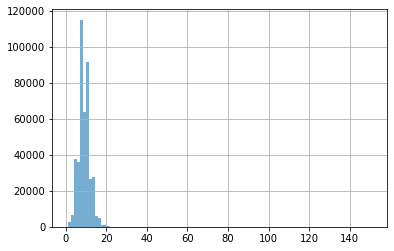

In [18]:
data['len'].hist(bins = 100, alpha = 0.6)
# data['lemma_len'].hist(bins = 100, alpha = 0.6)

In [19]:
# Removing any headlines longer than the 99.9th percentile
print(np.quantile(data['len'], q = 0.999))
data = data.loc[data['len'] <= np.quantile(data['len'], q = 0.999)]

21.0


In [20]:
wc = wordcloud.WordCloud().generate(" ".join(data['clean'].sample(10000)))
plt.imshow(wc)
plt.axis("off")
plt.show()

NameError: name 'wordcloud' is not defined

### Modeling

In [21]:
from sklearn import feature_extraction
from sklearn.model_selection import train_test_split

In [22]:
y_mean = data['is_sarcastic'].mean()
y_sum = data['is_sarcastic'].sum()
print(f'Count of sarcastic articles is: {y_sum} ({round(y_mean*100, 2)}%)')

Count of sarcastic articles is: 18387 (4.37%)


In [23]:
train = data.loc[data['year'] != '2020']
test = data.loc[data['year'] == '2020']

X_train = train['clean']
y_train = train['is_sarcastic']

X_test = test['clean']
y_test = test['is_sarcastic']

In [24]:
test[['clean', 'is_sarcastic']]

,clean,is_sarcastic
290860,former u s ambassador to iraq discusses tensio...,0
290861,u s sends reinforcements after u s embassy in ...,0
290862,news brief u s embassy stormed north korea 202...,0
290863,unicef says even in 2020 newborns are still vu...,0
290864,in israel netanyahu seeks immunity from prosec...,0
...,...,...
414990,5 90s era photos of david duchovny to pound yo...,1
414991,adorable winter handbags that are all just the...,1
414992,amazing this woman s bush grew so big the gove...,1
414993,how to pick a fight with your partner then cry...,1


In [25]:
print(f'Train Size: {X_train.shape[0]}')
print(f'Test Size: {X_test.shape[0]}')

Train Size: 396666
Test Size: 23661


In [26]:
cv = feature_extraction.text.CountVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             stop_words='english',
                                             ngram_range=(1,3),
                                             max_df = .8,
                                             min_df = 10)

tfidf = feature_extraction.text.TfidfVectorizer(lowercase = True,
                                             strip_accents = 'ascii',
                                             stop_words='english',
                                             ngram_range=(1,3),
                                             max_df = .8,
                                             min_df = 10)

In [27]:
print("Fitting Count Vectorizer")
cv.fit(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

Fitting Count Vectorizer


In [28]:
cv_vocab = cv.vocabulary_

In [29]:
X_train_cv = cv.transform(X_train)

In [30]:
X_train_cv

<396666x36452 sparse matrix of type '<class 'numpy.int64'>'
	with 2797057 stored elements in Compressed Sparse Row format>

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB

from sklearn.metrics import plot_roc_curve

In [32]:
lr_cv = LogisticRegression()
lr_cv.fit(X_train_cv, y_train)

C:\Users\yagne\.conda\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [33]:
mnb_cv = MultinomialNB()
mnb_cv.fit(X_train_cv, y_train)

MultinomialNB()

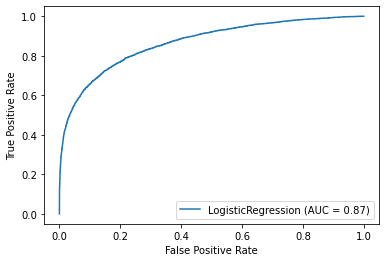

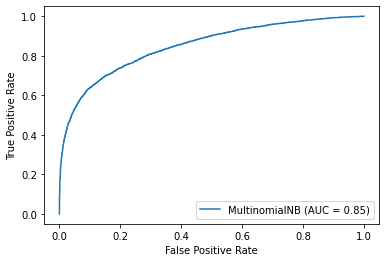

In [34]:
plot_roc_curve(lr_cv, X_test_cv, y_test)
plot_roc_curve(mnb_cv, X_test_cv, y_test)
plt.show()

In [35]:
print("Fitting TF-IDF Vectorizer")
tfidf.fit(X_train)
print("Transforming Datasets")
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

Fitting TF-IDF Vectorizer
Transforming Datasets


In [36]:
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)

C:\Users\yagne\.conda\envs\common\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

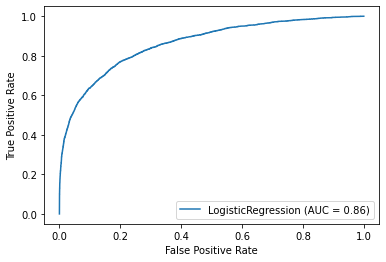

In [37]:
plot_roc_curve(lr_tfidf, X_test_tfidf, y_test)
plt.show()

In [38]:
reverse_vocab = {}

for key in cv_vocab.keys():
    reverse_vocab[cv_vocab[key]] = key

In [39]:
coef_dicts = []
for i, coef_ in enumerate(list(lr.coef_[0,:])):
    coef_dict = {'index':i, 'word': reverse_vocab[i], 'coef': coef_}
    coef_dicts.append(coef_dict)

NameError: name 'lr' is not defined

In [ ]:
coef_pd = pd.DataFrame(coef_dicts)

In [ ]:
coef_pd['abs_coef'] = coef_pd['coef'].apply(lambda x: abs(x))
coef_pd.sort_values('abs_coef', ascending=False)[:10]

In [ ]:
coef_pd.sort_values('abs_coef', ascending=False)[:50]